In [1]:
from cvrpy.pso import PSO

pso = PSO(
    lambda vec: 1/sum(vec),
    num_iterations=100,
    num_particles=100,
    num_dimensions=20
)

solution = pso.optimize()

print(type(solution))
print(solution.position)


<class 'cvrpy.pso.Particle'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1]:
from loggibud.v1.types import CVRPInstance
from cvrpy.particle.decoder import ParticleDecoder
from cvrpy.particle.factory import ParticleFactory

instance = CVRPInstance.from_file('data/cvrp_castanhal.json')
print(f'Número de clientes: {len(instance.deliveries)}')
print(f'Capacidade máxima por veículo: {instance.vehicle_capacity}')

# Cria uma partícula e decodifica gerando um CVRPSolution
particle = ParticleFactory.create_for(instance, sum, num_vehicles=5)
solution = ParticleDecoder.decode(particle.position, instance)

for vehicle in solution.vehicles:
    sizes = [d.size for d in vehicle.deliveries]
    print(f'Total = {sum(sizes)}', sizes, f'{len(sizes)} clientes')


Número de clientes: 35
Capacidade máxima por veículo: 180
Total = 135 [7, 4, 1, 3, 9, 10, 2, 1, 1, 1, 4, 7, 7, 9, 4, 10, 4, 4, 2, 4, 7, 6, 10, 2, 8, 8] 26 clientes
Total = 0 [] 0 clientes
Total = 40 [3, 10, 9, 5, 6, 7] 6 clientes
Total = 19 [8, 9, 2] 3 clientes
Total = 0 [] 0 clientes


## Função Objetivo

Deve calcular a distância percorrida em cada rota, para isso será usado o OSRM
como backend fornecedor dos cálculos de distâncias percorridas entre um ponto
e outro no mapa.

Dado um objeto de CVRPSolution que possui as entregas distribuídas entre os
veículos, pra cada veículo, a função deve calcular a distância entre o depósito
e a primeira entrega, depois entre a primeira e a segunda entrega e assim por
diante até voltar da última entrega para o depósito.

In [ ]:
# Comando para executar o container do osrm

# !docker run --rm -t -id --name osrm -p 5000:5000 -v "${PWD}/osrm:/data" osrm/osrm-backend:v5.24.0 osrm-routed --algorithm ch /data/brazil-201110.osrm --max-table-size 10000

In [2]:
from cvrpy.particle.decoder import ParticleDecoder
from cvrpy.particle.factory import ParticleFactory
from cvrpy.route_functions import vehicle_distance_traveled

# Cria uma partícula e decodifica gerando um CVRPSolution
particle = ParticleFactory.create_for(instance, sum, num_vehicles=5)
solution = ParticleDecoder.decode(particle.position, instance)

for i, vehicle in enumerate(solution.vehicles):
    print(f'Veículo {i+1}')
    print(f'\tNúmero de entregas: {len(vehicle.deliveries)}')
    print(f'\tDistância total: {vehicle_distance_traveled(vehicle)}')
    print(f'\tPeso: {vehicle.occupation}')

vehicle_distance_traveled(solution.vehicles[0])

Veículo 1
	Número de entregas: 5
	Distância total: 9766.7
	Peso: 31
Veículo 2
	Número de entregas: 24
	Distância total: 38805.4
	Peso: 128
Veículo 3
	Número de entregas: 0
	Distância total: 0.0
	Peso: 0
Veículo 4
	Número de entregas: 3
	Distância total: 66725.7
	Peso: 16
Veículo 5
	Número de entregas: 3
	Distância total: 109009.4
	Peso: 19


9766.7

## Usando a codificção no Random Walk

Rodando 1a execução... OK
Rodando 2a execução... OK
Rodando 3a execução... OK
Rodando 4a execução... OK
Rodando 5a execução... OK
Rodando 6a execução... OK
Rodando 7a execução... OK
Rodando 8a execução... OK
Rodando 9a execução... OK
Rodando 10a execução... OK


(<Figure size 1080x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Média e Desvio Padrão do fitness durante as execuções'}, xlabel='Iteração', ylabel='Valor da função objetivo'>)

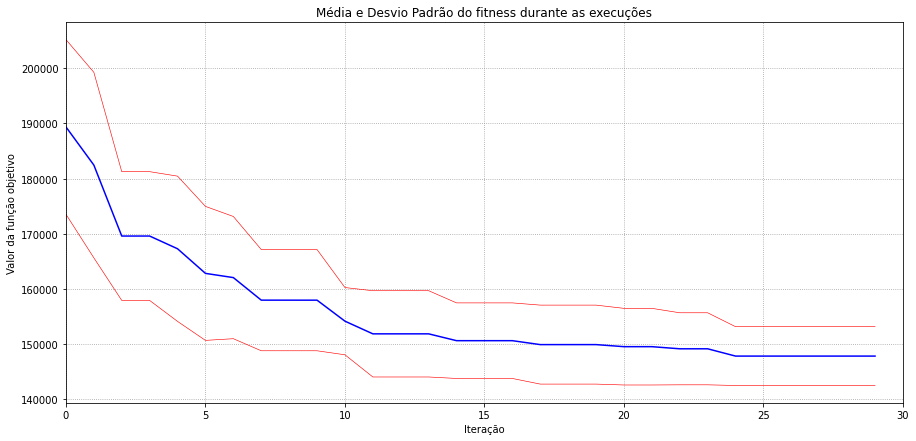

In [6]:
from cvrpy.rw import RandomWalk
from cvrpy.plotting import Plotter
from loggibud.v1.types import CVRPInstance

problem = CVRPInstance.from_file('./data/cvrp_castanhal.json')

rw = RandomWalk(num_individuals=4)

rw_convergences = []
for i in range(10):
    print(f'Rodando {i+1}a execução...', end=' ')
    rw.run(until=30, problem=problem, num_vehicles=5, verbose=False)
    rw_convergences.append(rw.get_convergence().copy())
    print('OK')

Plotter.plot_convergence(rw_convergences)